### Importing the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('MyCreditData.csv')

In [4]:
df.head()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,gender,profit
0,3,18,0,2,1049,4,2,2,2,3,...,21,1,0,0,1,0,0,0,female,242
1,3,9,0,5,2799,4,0,1,2,0,...,36,1,0,1,1,1,0,0,male,596
2,0,12,4,8,841,0,1,1,2,3,...,23,1,0,0,3,0,0,0,female,25
3,3,12,0,5,2122,4,0,0,2,0,...,39,1,0,1,3,1,0,1,male,568
4,3,12,0,5,2171,4,0,2,2,3,...,38,0,2,1,3,0,0,1,male,782


In [5]:
df.columns

Index(['checking_account', 'duration', 'credit_history', 'purpose', 'amount',
       'savings_account', 'employment_duration', 'installment_rate',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'gender', 'profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   int64 
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   int64 
 3   purpose                  1000 non-null   int64 
 4   amount                   1000 non-null   int64 
 5   savings_account          1000 non-null   int64 
 6   employment_duration      1000 non-null   int64 
 7   installment_rate         1000 non-null   int64 
 8   other_debtors            1000 non-null   int64 
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   int64 
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   int64 
 13  housing                  1000 non-null   int64 
 14  number_credits           1000 non-null   

### Refactoring Categorical Variables.

In [7]:
non_categorical_columns = ['duration', 'amount', 'age', 'profit']

for column in df.columns:
    if column not in non_categorical_columns:
        df[column] = pd.Categorical(df[column])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_duration      1000 non-null   category
 7   installment_rate         1000 non-null   category
 8   other_debtors            1000 non-null   category
 9   present_residence        1000 non-null   category
 10  property                 1000 non-null   category
 11  age                      1000 non-null   int64   
 12  other_installment_plans  1000 non-null   category
 13  housing                  1000 non-null   category
 14  number_cr

### Linear Regression

In [10]:
y = df['profit'] # dependent
x = df.iloc[:, :-1] # independent

#### Creating dummies.

In [11]:
x = pd.get_dummies(x, drop_first=True)

In [13]:
x.head()

,duration,amount,age,checking_account_1,checking_account_2,checking_account_3,credit_history_1,credit_history_2,credit_history_3,credit_history_4,...,number_credits_2,number_credits_3,job_1,job_2,job_3,people_liable_1,telephone_1,foreign_worker_1,gender_male,gender_nonbinary/notreported
0,18,1049,21,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,9,2799,36,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2,12,841,23,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,12,2122,39,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
4,12,2171,38,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False


In [14]:
y.head()

0    242
1    596
2     25
3    568
4    782
Name: profit, dtype: int64

### Model Selection

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

In [22]:
x_train.shape

(700, 53)

In [23]:
y_train.shape

(700,)

In [26]:
import statsmodels.api as sm

In [40]:
lin_reg_model = sm.OLS(y_train.astype(float), sm.add_constant(x_train).astype(float))
lin_reg_model_results = lin_reg_model.fit()
lin_reg_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.504
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.04e-20
Time:                        23:07:32   Log-Likelihood:                -5854.4
No. Observations:                 700   AIC:                         1.182e+04
Df Residuals:                     646   BIC:                         1.206e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          177.0458    521.753      0.339      0.734    -847.491    1201.582
duration                         5.9249      4.992      1.187      0.236      -3.878      15.728
amount                          -0.1645      0.023     -7.067      0.000      -0.210      -0.119
age                             -4.7354      4.426     -1.070      0.285     -13.426       3.955
checking_account_1             383.5347    109.809      3.493      0.001     167.909     599.160
checking_account_2             272.9559    194.404      1.404      0.161    -108.783     654.695
checking_account_3              -0.3159    120.379     -0.003      0.998    -236.697     236.065
credit_history_1              -425.2826    231.296     -1.839      0.066    -879.465      28.899
credit_history_2              -355.7708    225.001     -1.581      0.114    -797.592      86.050
credit_history_3               214.6914    163.793      1.311      0.190    -106.940     536.322
credit_history_4              -288.1258    123.738     -2.329      0.020    -531.103     -45.148
purpose_1                      795.4233    408.957      1.945      0.052      -7.622    1598.468
purpose_2                      453.9388    409.175      1.109      0.268    -349.535    1257.412
purpose_3                       38.8300    488.921      0.079      0.937    -921.237     998.897
purpose_4                      337.9475    408.479      0.827      0.408    -464.159    1140.054
purpose_5                      156.0686    402.992      0.387      0.699    -635.263     947.400
purpose_6                      290.4959    560.814      0.518      0.605    -810.743    1391.735
purpose_7                       58.9631    446.982      0.132      0.895    -818.751     936.677
purpose_8                      201.9848    418.864      0.482      0.630    -620.514    1024.483
purpose_9                      237.4508    548.159      0.433      0.665    -838.938    1313.840
savings_account_1              306.9933    164.222      1.869      0.062     -15.479     629.466
savings_account_2             -191.4130    216.874     -0.883      0.378    -617.275     234.449
savings_account_3               52.1145    233.507      0.223      0.823    -406.410     510.639
savings_account_4              -71.2509    144.841     -0.492      0.623    -355.666     213.165
employment_duration_1          292.4289    126.496      2.312      0.021      44.036     540.822
employment_duration_2          -24.9067    129.955     -0.192      0.848    -280.092     230.279
employment_duration_3          -80.0715    127.756     -0.627      0.531    -330.939     170.797
employment_duration_4          128.3469    210.097      0.611      0.541    -284.209     540.903
installment_rate_1             102.4281    140.592      0.729      0.467    

### Using RMSE (Root Mean Square Error)

In [41]:
from sklearn.metrics import mean_squared_error

In [44]:
def root_mean_squared_error(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

### Training Data

In [58]:
predictions_training = lin_reg_model_results.predict(sm.add_constant(x_train))
predictions_validation = lin_reg_model_results.predict(sm.add_constant(x_val))

In [60]:
rmse_training = round(root_mean_squared_error(y_train, predictions_training), 1)
rmse_val = round(root_mean_squared_error(y_val, predictions_validation), 1)

In [61]:
print(f"RMSE on the training data: {rmse_training}")
print(f"RMSE on the validation data: {rmse_val}")

RMSE on the training data: 1037.4
RMSE on the validation data: 1137.9


### LASSO Regulation

#### Normalizing the data.

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
x_scaled = scaler.fit_transform(x)

In [75]:
x_scaled_train, x_scaled_val = train_test_split(x_scaled, test_size=0.3, random_state=1)

#### Running the lasso model

In [76]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [77]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(x_scaled_train, y_train)

Lasso(alpha=1)

In [78]:
lasso_rmse_training = round(root_mean_squared_error(y_train, lasso_model.predict(x_scaled_train)), 1)
lasso_rmse_val = round(root_mean_squared_error(y_val, lasso_model.predict(x_scaled_val)), 1)

In [81]:
print(f"RMSE on the training data: {lasso_rmse_training}")
print(f"RMSE on the validation data: {lasso_rmse_val}")

RMSE on the training data: 1037.5
RMSE on the validation data: 1136.8


In [82]:
coef_table = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lasso_model.coef_))], axis=1)
coef_table.columns = ["", "Coefficient"]
coef_table.set_index('', inplace=True)
coef_table

,Coefficient
,
duration,67.829586
amount,-461.815112
age,-51.106541
checking_account_1,186.174855
checking_account_2,65.114807
checking_account_3,-0.000000
credit_history_1,-89.232401
credit_history_2,-68.180693
credit_history_3,61.023047


#### Finding the best Lambda value.

In [112]:
alphas = np.arange(0.01, 50, .5)
lasso_cv_model = LassoCV(alphas=alphas, cv=5, max_iter=50000)

In [113]:
lasso_cv_model.fit(x_scaled_train, y_train)
print('alpha: %f' % lasso_cv_model.alpha_)

alpha: 45.510000


In [121]:
lasso_cv_model.n_features_in_

53

53

#### Fit the best lasso model

In [114]:
lasso_best_model = Lasso(alpha=lasso_cv_model.alpha_)
lasso_best_model.fit(x_scaled_train, y_train)

Lasso(alpha=45.51)

In [118]:
lasso_best_rmse_training = round(root_mean_squared_error(y_train, lasso_best_model.predict(x_scaled_train)), 1)
lasso_best_rmse_val = round(root_mean_squared_error(y_val, lasso_best_model.predict(x_scaled_val)), 1)

In [119]:
print(f"RMSE on the training data: {lasso_best_rmse_training}")
print(f"RMSE on the validation data: {lasso_best_rmse_val}")

RMSE on the training data: 1073.5
RMSE on the validation data: 1130.2


#### Checking the Eliminated fetaures.

In [124]:
eliminated_features = sum(lasso_best_model.coef_ == 0)

In [125]:
eliminated_features

33

In [128]:
surviving_features = [feature for feature, coef in zip(df.columns, lasso_model.coef_) if coef != 0]
print("Surviving Features:", len(surviving_features))

Surviving Features: 19


### Applying Ridge Model

In [130]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_scaled_train, y_train)

Ridge(alpha=1)

In [131]:
ridge_rmse_training = round(root_mean_squared_error(y_train, ridge_model.predict(x_scaled_train)), 1)
ridge_rmse_val = round(root_mean_squared_error(y_val, ridge_model.predict(x_scaled_val)), 1)

In [132]:
print(f"RMSE on the training data: {ridge_rmse_training}")
print(f"RMSE on the validation data: {ridge_rmse_val}")

RMSE on the training data: 1037.4
RMSE on the validation data: 1137.6


In [148]:
alphas = np.arange(200, 400, 1)
ridge_cv_model = RidgeCV(alphas=alphas, cv=5)

In [149]:
ridge_cv_model.fit(x_scaled_train, y_train)
print('alpha: %f' % ridge_cv_model.alpha_)

alpha: 298.000000


In [150]:
ridge_best_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_best_model.fit(x_scaled_train, y_train)

Ridge(alpha=298)

In [151]:
ridge_best_rmse_training = round(root_mean_squared_error(y_train, ridge_best_model.predict(x_scaled_train)), 1)
ridge_best_rmse_val = round(root_mean_squared_error(y_val, ridge_best_model.predict(x_scaled_val)), 1)

In [153]:
print(f"RMSE on the training data: {ridge_best_rmse_training}")
print(f"RMSE on the validation data: {ridge_best_rmse_val}")

RMSE on the training data: 1062.6
RMSE on the validation data: 1136.9


### Plotting the regression coefficients.

In [156]:
coef_table = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lasso_best_model.coef_)), pd.DataFrame(np.transpose(ridge_best_model.coef_))], axis=1)
coef_table.columns = ["", "Lasso", "Ridge"]
coef_table.set_index('', inplace=True)

In [157]:
coef_table

,Lasso,Ridge
,,
duration,0.000000,-39.467001
amount,-338.945613,-236.712634
age,-0.000000,-30.667401
checking_account_1,145.598553,121.319595
checking_account_2,12.407411,40.983555
checking_account_3,-0.000000,-23.545514
credit_history_1,-21.665397,-49.259781
credit_history_2,-33.485478,-61.623683
credit_history_3,38.799652,49.471488


In [159]:
import matplotlib.pyplot as plt

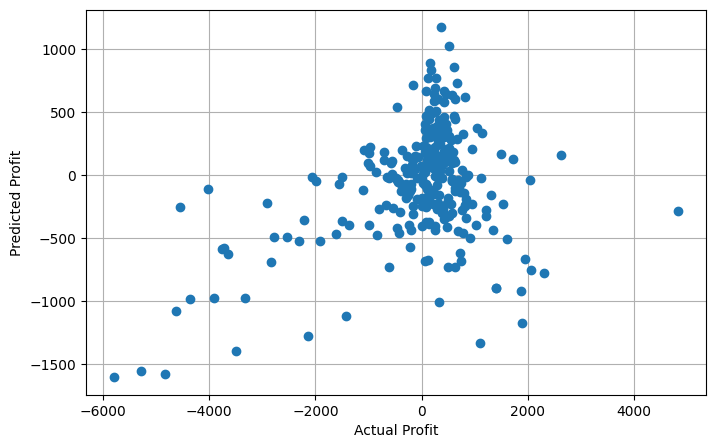

In [160]:
plt.figure(figsize=(8, 5))
plt.plot(y_val, lasso_best_model.predict(x_scaled_val), 'o')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid()